In [132]:
#imort packages
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import random
from sklearn.metrics import classification_report
import imblearn
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import pandas as pd
import researchpy as rp
import scipy.stats as stats
from category_encoders.ordinal import OrdinalEncoder
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB


# (0) desprective statistics

In [6]:
dataset = pd.read_csv('C:/Users/kobig/Seminar_project/fraud_oracle.csv')
dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


#### ****desprective statisitc - numeric features****

In [ ]:
dataset.describe()


#### ****desprective statisitc - qualtive features****

In [ ]:
dataset.describe(include=['object'])

#### intresting variablas

In [ ]:
print(dataset['FraudFound_P'].value_counts(),'\n') # 923 frauds and 14497 not fraud - outcome
print(dataset['AgeOfPolicyHolder'].value_counts(),'\n')
print(dataset['WitnessPresent'].value_counts(), '\n')
print(dataset['PoliceReportFiled'].value_counts())


In [ ]:
# creating data for the plot
data_FraudFound_P = pd.DataFrame({'category':['Not Fraud', 'Fraud'],
                     'counts': dataset['FraudFound_P'].value_counts().values,
                     'percentage': [round(sum(dataset.FraudFound_P == 0)/len(dataset), 3)*100 ,
                                    round(sum(dataset.FraudFound_P == 1)/len(dataset), 3)*100]
                    })
 

plt.figure(figsize=(8,8))
colors_list = ['tab:blue', 'tab:red']
graph = plt.bar(data_FraudFound_P.category,data_FraudFound_P.counts, color = colors_list)
plt.title("Figure 1: Percentage of Fraud and not fraud")

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data_FraudFound_P.percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

#### bar plots Fraud againg important variabls

In [ ]:
dataset.columns

In [ ]:
sns.catplot(y="Make", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Make and Fraud")
plt.show()


In [ ]:
sns.catplot(x="AccidentArea", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AccidentArea and Fraud")
plt.show()


In [ ]:
sns.catplot(x="Sex", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Sex and Fraud")
plt.show()


In [ ]:
sns.catplot(x="Month", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Month and Fraud")
plt.show()


In [ ]:
sns.catplot(x="MaritalStatus", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Sex and Fraud")
plt.show()


In [ ]:
sns.catplot(x="DriverRating", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "DriverRating and Fraud")
plt.show()


In [ ]:
sns.catplot(x="Deductible", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "deductible and Fraud")
plt.show()

In [ ]:
sns.catplot(y="AgeOfVehicle", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AgeOfVehicle and Fraud")
plt.show()

In [ ]:
sns.catplot(x="WitnessPresent", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "WitnessPresent and Fraud")
plt.show()

In [ ]:
sns.catplot(x="AgentType", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AgentType and Fraud")
plt.show()

In [ ]:
sns.catplot(x="PastNumberOfClaims", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "PastNumberOfClaims and Fraud")
plt.show()

In [ ]:
sns.catplot(x="PoliceReportFiled", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "PoliceReportFiled and Fraud")
plt.show()

In [ ]:
dataset.columns[~dataset.columns.isin(["Age", 'Month'])]

### χ^2 test

In [ ]:
col_names = dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    col_names = col_names[col_names != i]
    for j in col_names:
        crosstab, test_results, expected = rp.crosstab(dataset[i], dataset[j],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
        if test_results['results'][1] < 0.05:
            print(i + ' ' + j + ':')
            print(test_results)
            print('\n')
    print('****** new ******')
    

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    crosstab, test_results, expected = rp.crosstab(dataset[i], dataset['FraudFound_P'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    if test_results['results'][1] < 0.05:
        print(i + ':')
        print(test_results)
        print('\n')

    

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    crosstab, test_results, expected = rp.crosstab(dataset[i], dataset['FraudFound_P'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    if test_results['results'][1] > 0.05:
        print(i + ':')
        print(test_results)
        print('\n')


In [ ]:
pd.crosstab(dataset.Sex, dataset.FraudFound_P)


In [ ]:
pd.crosstab(dataset.Sex, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.AccidentArea, dataset.FraudFound_P)

In [ ]:
pd.crosstab(dataset.AccidentArea, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P)

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    print(pd.crosstab(dataset[i], dataset.FraudFound_P))
    print(pd.crosstab(dataset[i], dataset.FraudFound_P, normalize = 'columns'))
   

# (1) Data preproccesing 

#### changing the zero values to nan values in columns: Age, DayOfWeekClaimed, weekclaimed

In [7]:
#Age
print(sum(dataset['Age']  == 0))
dataset.loc[dataset['Age'] == 0, 'Age'] = np.nan

#DayOfWeekClaimed
print(dataset['DayOfWeekClaimed'].unique())
dataset[dataset['DayOfWeekClaimed'] == '0'] # obs 1516 has a 
dataset.loc[dataset['DayOfWeekClaimed'] == 0, 'DayOfWeekClaimed'] = np.nan

#MonthClaimed
print(sum(dataset['MonthClaimed']  == '0'))
dataset.loc[dataset['MonthClaimed'] == '0', 'DayOfWeekClaimed'] = np.nan

320
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
1


### calculate number of day between the accident to the claimed

In [8]:
dataset.loc[:, dataset.columns[dataset.columns.isin(['Month', 'WeekOfMonth', 'DayOfWeek','DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed','Year'])]].head()

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Year
0,Dec,5,Wednesday,Tuesday,Jan,1,1994
1,Jan,3,Wednesday,Monday,Jan,4,1994
2,Oct,5,Friday,Thursday,Nov,2,1994
3,Jun,2,Saturday,Friday,Jul,1,1994
4,Jan,5,Monday,Tuesday,Feb,2,1994


### function for dropping Irrelevant_colmuns - PolicyType, PolicyNumber


In [9]:
def Irrelevant_col(df , drop):
    df.drop(drop, axis=1, inplace=True)


#drop in my data set    
drop = ["PolicyType","PolicyNumber"] 
dataset_new = dataset
Irrelevant_col(dataset_new, drop)

dataset_new

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


### 1.(a) null values of age, day of week - replacing with mean

In [10]:
# removing rows
dataset_new_rem = dataset_new.dropna(subset = ['Age'])
dataset_new_rem = dataset_new_rem.dropna(subset =['MonthClaimed' ,'DayOfWeekClaimed'])
#print(dataset_new_rem.isnull().sum())

# avereging
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') 
# We instantiated a SimpleImputer object looking for missing values that are represented
#by np.NaN and asking Scikit-Learn to use the 'mean' as its strategy. 
#This means that any np.NaN values will be imputed by the columns mean.

dataset_new_avg = dataset_new
imputer=imputer.fit(dataset_new_avg[['Age']])
dataset_new_avg[['Age']]=imputer.transform(dataset_new_avg[['Age']])
dataset_new_avg = dataset_new_avg.dropna(subset =['MonthClaimed' ,'DayOfWeekClaimed'])
#print(dataset_new_avg.isnull().sum())

### 1.(b) dealing with categorials features

In [ ]:
dataset_new.dtypes

In [11]:
y =  dataset_new.FraudFound_P.copy()
X = dataset_new.drop('FraudFound_P', axis = 1, inplace=False ).copy()

#### Binary variables zero one coding:

In [12]:
cols = ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
y_val = ['Urban','Female','Policy Holder', 'Yes', 'Yes','External']
x_val = ['Rural', 'Male', 'Third Party', 'No', 'No', 'Internal']

for i in range(len(cols)):
    X_idx1 = X[cols[i]]==y_val[i]
    X_idx2 = X[cols[i]]==x_val[i]

    X.loc[list(X_idx1),cols[i]]=1
    X.loc[list(X_idx2),cols[i]]=0

for i in range(len(cols)):
    X[cols[i]] = X[cols[i]].astype('int')
    
X.dtypes

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea              int32
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                       int32
MaritalStatus            object
Age                     float64
Fault                     int32
VehicleCategory          object
VehiclePrice             object
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident     object
Days_Policy_Claim        object
PastNumberOfClaims       object
AgeOfVehicle             object
AgeOfPolicyHolder        object
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments      object
AddressChange_Claim      object
NumberOfCars             object
Year                      int64
BasePolicy               object
dtype: object

#### Ordianal categorial featurs:

In [17]:
col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
    {'col':'VehiclePrice','mapping':{'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)
X2 = ord_encoder.fit_transform(X)
X2.loc[X2["DayOfWeekClaimed"] == -1.0,"DayOfWeekClaimed"] = 0
X2.loc[X2["MonthClaimed"] == -1.0,"MonthClaimed"] = 0

#### ordianal categorial featurs - taking the avg for each category 
maybe sould we split the data to train, val and test first?

In [18]:
col_map = [{'Days_Policy_Accident':{'more than 30': 31,'15 to 30': 22.5,'none': 0,'1 to 7': 4,'8 to 15': 11.5}},
    {'Days_Policy_Claim':{'more than 30': 31,'15 to 30': 22.5,'8 to 15': 11.5,'none': 0}},
    {'AgeOfPolicyHolder':{'26 to 30':28,'31 to 35':33,'41 to 50':45.5,'51 to 65':58,'21 to 25':23,'36 to 40':38,'16 to 17':16.5,
                                          'over 65':66,'18 to 20':19}},
    {'AddressChange_Claim':{'1 year':1,'no change':0,'4 to 8 years':6,'2 to 3 years':2.5,'under 6 months':0.5}},
    {'NumberOfCars':{'3 to 4':3.5,'1 vehicle':1,'2 vehicles':2,'5 to 8':6.5,'more than 8':9}},
]

X3 = X2.copy()
for i in range(len(col_map)):
    X3.replace(col_map[i], inplace=True)

X3.dtypes

Month                     int32
WeekOfMonth               int64
DayOfWeek                 int32
Make                     object
AccidentArea              int32
DayOfWeekClaimed        float64
MonthClaimed            float64
WeekOfMonthClaimed        int64
Sex                       int32
MaritalStatus            object
Age                     float64
Fault                     int32
VehicleCategory          object
VehiclePrice              int32
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident    float64
Days_Policy_Claim       float64
PastNumberOfClaims        int32
AgeOfVehicle              int32
AgeOfPolicyHolder       float64
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments       int32
AddressChange_Claim     float64
NumberOfCars            float64
Year                      int64
BasePolicy               object
dtype: object

#### One hot endoder for the categorial features

In [19]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.binary import BinaryEncoder
from category_encoders.one_hot import OneHotEncoder

#implementing one-hot encoding
one_hot_encoder = OneHotEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],use_cat_names=True, return_df=True) 

#implementing label encoding, with random assignment of integers to each label
# assumes no natrual underlying order to the feature labels
ord_encoder1 = OrdinalEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],return_df=True)

#implementing binary encoding
#represents the data 
bi_encoder = BinaryEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'], return_df=True)

#implimented a simple switch to change how I wanted to encode the variables
#Allowed for a updating the independet variables quickly and not missing a code box

switch_val = 0
if switch_val ==0:
    X4 = one_hot_encoder.fit_transform(X3)
elif switch_val==1:
    X4 = ord_encoder1.fit_transform(X3)
else:
    X4 = bi_encoder.fit_transform(X3)
    
X4.dtypes


Month                        int32
WeekOfMonth                  int64
DayOfWeek                    int32
Make_Honda                   int64
Make_Toyota                  int64
Make_Ford                    int64
Make_Mazda                   int64
Make_Chevrolet               int64
Make_Pontiac                 int64
Make_Accura                  int64
Make_Dodge                   int64
Make_Mercury                 int64
Make_Jaguar                  int64
Make_Nisson                  int64
Make_VW                      int64
Make_Saab                    int64
Make_Saturn                  int64
Make_Porche                  int64
Make_BMW                     int64
Make_Mecedes                 int64
Make_Ferrari                 int64
Make_Lexus                   int64
AccidentArea                 int32
DayOfWeekClaimed           float64
MonthClaimed               float64
WeekOfMonthClaimed           int64
Sex                          int32
MaritalStatus_Single         int64
MaritalStatus_Marrie

# (3)splitting our data to train, validation and test sets


In [20]:

random.seed(10)
def train_val_test_split(X, y, train_ratio, validation_ratio, test_ratio):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state = 3)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                          test_size= validation_ratio/(train_ratio+validation_ratio), random_state =3)
    return X_train, y_train, X_valid, y_valid,  X_test, y_test

X_train, y_train, X_valid, y_valid,  X_test, y_test = train_val_test_split(X= X4, y = y, train_ratio= 0.7, validation_ratio= 0.2, test_ratio = 0.1)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)
print(len(y_valid)/len(y))

(10793, 55)
(1542, 55)
(3085, 55)
(10793,)
(1542,)
(3085,)
0.20006485084306097


# (4) First Try - RF

#### (5).1 clasifier

In [21]:
# Random forest
forest = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 3, max_depth =5)
forest.fit(X_train, y_train)
rf_predictions = forest.predict(X_valid)


#### (5.2) measures

In [22]:
print('Accuracy of RF', metrics.accuracy_score(y_valid, rf_predictions), sum(rf_predictions), '\n')
print("Roc Auc:",roc_auc_score(y_valid,rf_predictions))
print(classification_report(y_valid, rf_predictions))


Accuracy of RF 0.9410048622366288 0 

Roc Auc: 0.5
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2903
           1       0.00      0.00      0.00       182

    accuracy                           0.94      3085
   macro avg       0.47      0.50      0.48      3085
weighted avg       0.89      0.94      0.91      3085



C:\Users\kobig\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kobig\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kobig\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### (5).3 confusion matrix

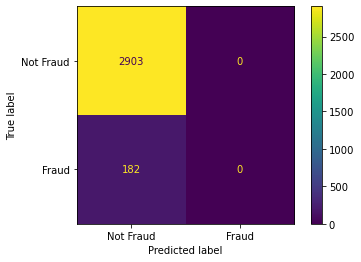

In [23]:
#another CM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_valid, rf_predictions, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()

# (5) **Oversamling** - second try for RF

#### (5.1) oversampling

In [27]:

print('Original traim shape %s' % Counter(y_train))
sm = SMOTE(random_state=2022)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled train shape %s' % Counter(y_res))


Original traim shape Counter({0: 10143, 1: 650})
Resampled train shape Counter({0: 10143, 1: 10143})


#### (5.1) undersampling

In [59]:
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_under, y_under = undersample.fit_resample(X_train, y_train)
# summarize the new class distribution
print('Resampled train shape %s' % Counter(y_under))

Resampled train shape Counter({0: 650, 1: 650})


#### (5.2) classifier

In [119]:
forest_over = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
forest_over.fit(X_res, y_res)
rf_over_predictions = forest_over.predict(X_valid)

In [60]:
forest_under = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
forest_under.fit(X_under, y_under)
rf_under_predictions = forest_under.predict(X_valid)

In [92]:
forest_weight = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5, 
                                       class_weight={0: 1 ,1:1.3})
forest_weight.fit(X_under, y_under)
rf_weight_predictions = forest_weight.predict(X_valid)

#### (5.2) measures

In [120]:
print("Roc Auc:",roc_auc_score(y_valid,rf_over_predictions))
print(classification_report(y_valid, rf_over_predictions))


Roc Auc: 0.6764402493820337
              precision    recall  f1-score   support

           0       0.97      0.73      0.83      2903
           1       0.13      0.62      0.21       182

    accuracy                           0.73      3085
   macro avg       0.55      0.68      0.52      3085
weighted avg       0.92      0.73      0.80      3085



In [105]:
print("Roc Auc:",roc_auc_score(y_valid,rf_under_predictions))
print(classification_report(y_valid, rf_under_predictions))

Roc Auc: 0.657670352382719
              precision    recall  f1-score   support

           0       0.98      0.47      0.64      2903
           1       0.09      0.84      0.16       182

    accuracy                           0.50      3085
   macro avg       0.54      0.66      0.40      3085
weighted avg       0.93      0.50      0.61      3085



In [106]:
print("Roc Auc:",roc_auc_score(y_valid,rf_weight_predictions))
print(classification_report(y_valid, rf_weight_predictions))

Roc Auc: 0.6714851631317357
              precision    recall  f1-score   support

           0       0.99      0.41      0.58      2903
           1       0.09      0.93      0.16       182

    accuracy                           0.44      3085
   macro avg       0.54      0.67      0.37      3085
weighted avg       0.94      0.44      0.56      3085



In [109]:
from imblearn.metrics import geometric_mean_score
print(geometric_mean_score(y_valid,rf_over_predictions))
print(geometric_mean_score(y_valid,rf_under_predictions))
print(geometric_mean_score(y_valid,rf_weight_predictions))

0.6741545609009189
0.6317003423876768
0.6203216717384017


#### (5.3) confusion matrix


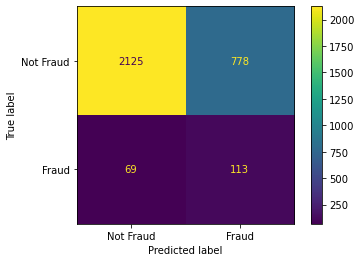

In [30]:
#another CM
cm = confusion_matrix(y_valid, rf_over_predictions, labels=forest_over.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()

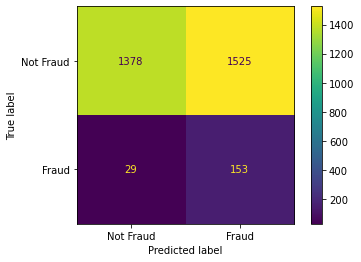

In [62]:
#another CM
cm = confusion_matrix(y_valid, rf_under_predictions, labels=forest_under.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()

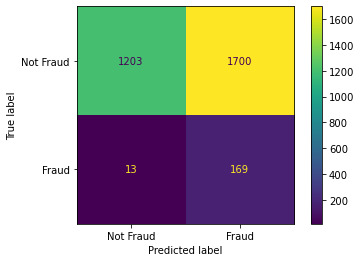

In [94]:
cm = confusion_matrix(y_valid, rf_weight_predictions, labels=forest_weight.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()

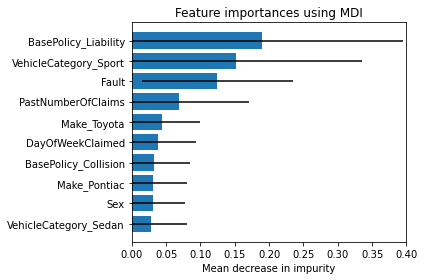

In [68]:
feature_names = [f"feature {i}" for i in range(X_res.shape[1])]
importances = forest_over.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_over.estimators_], axis=0)
std = pd.Series(std, index = X_res.columns)
forest_importances = pd.Series(importances, index=X_res.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:10]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:10], forest_importances[0:10], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.4)
fig.tight_layout()

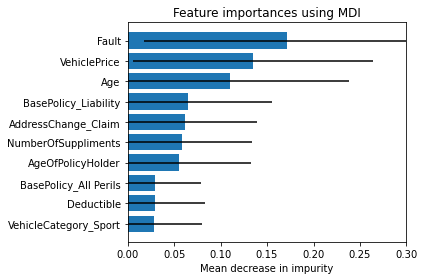

In [112]:
feature_names = [f"feature {i}" for i in range(X_under.shape[1])]
importances = forest_under.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_under.estimators_], axis=0)
std = pd.Series(std, index = X_res.columns)
forest_importances = pd.Series(importances, index=X_under.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:10]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:10], forest_importances[0:10], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.3)
fig.tight_layout()

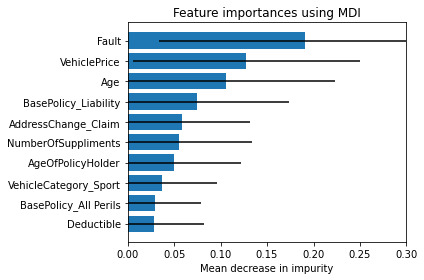

In [113]:
feature_names = [f"feature {i}" for i in range(X_under.shape[1])]
importances = forest_weight.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_weight.estimators_], axis=0)
std = pd.Series(std, index = X_res.columns)
forest_importances = pd.Series(importances, index=X_res.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:10]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:10], forest_importances[0:10], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.3)
fig.tight_layout()

# Naive Bayes

In [212]:
mutual_filter = SelectKBest(mutual_info_classif, k=12)
naiv_b = BernoulliNB()
naive_over = make_pipeline(mutual_filter, StandardScaler(), SVM_over)
naiv_b.fit(X_res, y_res)
nb_predictions = naiv_b.predict(X_valid)



In [213]:
print('Accuracy of RF not resampled', metrics.accuracy_score(y_valid, nb_predictions), sum(nb_predictions), '\n')
print("Roc Auc:",roc_auc_score(y_valid,nb_predictions))
print(classification_report(y_valid, nb_predictions))

Accuracy of RF not resampled 0.7189627228525122 919 

Roc Auc: 0.6832956055312239
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      2903
           1       0.13      0.64      0.21       182

    accuracy                           0.72      3085
   macro avg       0.55      0.68      0.52      3085
weighted avg       0.92      0.72      0.79      3085



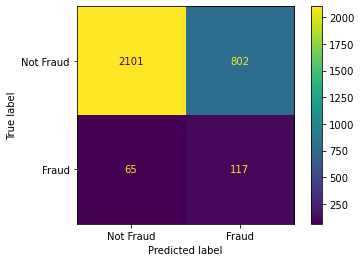

In [215]:
cm = confusion_matrix(y_valid, nb_predictions, labels=naive_over.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()

In [ ]:
#X_dov = SelectKBest(f_classif, k = 30).transform(X_res)
#X_dov 
#print(type(X_res) ,type(X_train))
#print(" Xdov type is:", type(X_dov))

The link for the example https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest.inverse_transform

# SVM

#### SVM oversamling

In [180]:
mutual_filter = SelectKBest(mutual_info_classif, k=12)
SVM_over = SVC(gamma='auto')
svm_over = make_pipeline(mutual_filter, StandardScaler(), SVM_over)
svm_over.fit(X_res, y_res)
SVM_over_predictions = svm_over.predict(X_valid)


Roc Auc: 0.7107085129820232
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      2903
           1       0.13      0.74      0.22       182

    accuracy                           0.69      3085
   macro avg       0.55      0.71      0.51      3085
weighted avg       0.93      0.69      0.77      3085

G-mean: 0.7102489148095479


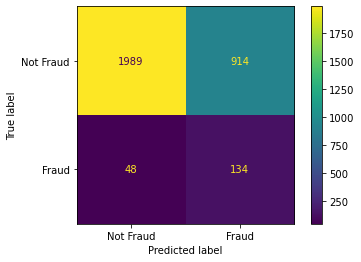

In [144]:
print("Roc Auc:",roc_auc_score(y_valid,SVM_over_predictions))
print(classification_report(y_valid, SVM_over_predictions))
print('G-mean:', geometric_mean_score(y_valid,SVM_over_predictions))


cm = confusion_matrix(y_valid, SVM_over_predictions, labels=svm_over.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()

In [181]:
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeekClaimed', 'MonthClaimed', 'Age', 'Fault',
       'VehicleCategory_Sport', 'VehicleCategory_Sedan',
       'PastNumberOfClaims', 'AgeOfPolicyHolder', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'BasePolicy_Liability'],
      dtype=object)

#### SVM undersamling

In [162]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
SVM_classifier = SVC(gamma='auto')
svm_under = make_pipeline(mutual_filter, StandardScaler(), SVM_classifier)
svm_under.fit(X_under, y_under)
svm_under_predictions = svm_under.predict(X_valid)


Roc Auc: 0.6511424331782583
              precision    recall  f1-score   support

           0       0.98      0.47      0.64      2903
           1       0.09      0.83      0.16       182

    accuracy                           0.49      3085
   macro avg       0.53      0.65      0.40      3085
weighted avg       0.93      0.49      0.61      3085

G-mean: 0.6261902733669844


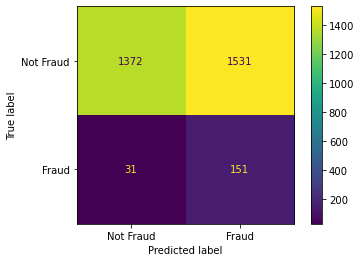

In [164]:
print("Roc Auc:",roc_auc_score(y_valid,svm_under_predictions))
print(classification_report(y_valid, svm_under_predictions))
print('G-mean:', geometric_mean_score(y_valid,svm_under_predictions))


cm = confusion_matrix(y_valid, svm_under_predictions, labels=svm_under.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()

In [179]:
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['WeekOfMonth', 'DayOfWeek', 'Make_Ford', 'Make_Chevrolet', 'Age',
       'Fault', 'VehiclePrice', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy_Liability', 'BasePolicy_All Perils'], dtype=object)

#### SVM weight

In [209]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
SVM_classifier = SVC(gamma='auto', class_weight = {0:1 , 1:20})
svm_weight = make_pipeline(mutual_filter, StandardScaler(), SVM_classifier)
svm_weight.fit(X_train, y_train)
svm_weight_predictions = svm_weight.predict(X_valid)


Roc Auc: 0.7501968407066582
              precision    recall  f1-score   support

           0       0.99      0.57      0.73      2903
           1       0.12      0.93      0.21       182

    accuracy                           0.59      3085
   macro avg       0.56      0.75      0.47      3085
weighted avg       0.94      0.59      0.70      3085

G-mean: 0.7286822395326541


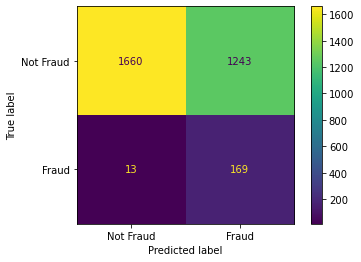

In [210]:
print("Roc Auc:",roc_auc_score(y_valid,svm_weight_predictions))
print(classification_report(y_valid, svm_weight_predictions))
print('G-mean:', geometric_mean_score(y_valid,svm_weight_predictions))


cm = confusion_matrix(y_valid, svm_weight_predictions, labels=svm_weight.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()

In [188]:
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['WeekOfMonth', 'Make_Mercury', 'Age', 'Fault',
       'VehicleCategory_Sport', 'VehicleCategory_Utility',
       'VehicleCategory_Sedan', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgentType',
       'BasePolicy_Liability', 'BasePolicy_All Perils'], dtype=object)